In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks', font_scale = 1.2)

In [2]:
df = pd.read_csv('data/Nitrate_Florida_transfose.csv', encoding = 'cp949')
df = df.copy()
df['Date'] = df['Date'].astype('datetime64[D]')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 15 columns):
Unnamed: 0     37 non-null int64
Date           37 non-null datetime64[ns]
NH4-T(mg/L)    33 non-null float64
SO4(mg/L)      37 non-null float64
Pb-T(ug/L)     17 non-null float64
PO4-T(mg/L)    27 non-null float64
TOC(mg/L)      37 non-null float64
TP-T(mg/L)     9 non-null float64
Mn-T(mg/L)     37 non-null float64
Fe-T(mg/L)     37 non-null float64
Nox-T(mg/L)    37 non-null float64
DO(mg/L)       28 non-null float64
pH-Field       28 non-null float64
depth(ft)      33 non-null float64
Station        37 non-null object
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 4.5+ KB


In [4]:
df = df[(df['Station'] == 'M-0779') | (df['Station'] == 'M-0780') | (df['Station'] == 'M-0781')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 15 columns):
Unnamed: 0     27 non-null int64
Date           27 non-null datetime64[ns]
NH4-T(mg/L)    27 non-null float64
SO4(mg/L)      27 non-null float64
Pb-T(ug/L)     17 non-null float64
PO4-T(mg/L)    27 non-null float64
TOC(mg/L)      27 non-null float64
TP-T(mg/L)     9 non-null float64
Mn-T(mg/L)     27 non-null float64
Fe-T(mg/L)     27 non-null float64
Nox-T(mg/L)    27 non-null float64
DO(mg/L)       27 non-null float64
pH-Field       27 non-null float64
depth(ft)      27 non-null float64
Station        27 non-null object
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 3.4+ KB


In [5]:
X = df[['NH4-T(mg/L)', 'SO4(mg/L)', 'Mn-T(mg/L)', 'Fe-T(mg/L)', 'Nox-T(mg/L)', 'PO4-T(mg/L)', 'TOC(mg/L)', 'Fe-T(mg/L)', 'DO(mg/L)']]
Y = df[['Station']]

X

,NH4-T(mg/L),SO4(mg/L),Mn-T(mg/L),Fe-T(mg/L),Nox-T(mg/L),PO4-T(mg/L),TOC(mg/L),Fe-T(mg/L),DO(mg/L)
0,0.187651,44.0911,0.003945,0.062152,0.0085,0.0148,2.090,0.062152,0.12
1,0.181323,1.9158,0.003891,0.072209,0.0131,0.0249,2.290,0.072209,0.07
2,0.172222,38.6228,0.003606,0.056512,0.0080,0.0248,1.770,0.056512,0.12
3,0.166495,38.5716,0.003257,0.037487,0.0120,0.0192,3.020,0.037487,0.00
4,0.185579,42.8954,0.003591,0.051488,0.0162,0.0232,1.514,0.051488,0.13
5,0.178224,38.4090,0.003330,0.027727,0.0151,0.0236,2.250,0.027727,0.02
6,0.181150,40.6581,0.002917,0.023966,0.0065,0.0192,1.050,0.023966,0.09
7,0.174788,38.7036,0.003260,0.027960,0.0115,0.0206,4.380,0.027960,0.12
8,0.184117,39.2976,0.003633,0.039834,0.0122,0.0190,3.120,0.039834,0.30
9,0.317570,1.3516,0.011507,0.228983,0.0036,0.0603,2.870,0.228983,0.12


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 9 columns):
NH4-T(mg/L)    27 non-null float64
SO4(mg/L)      27 non-null float64
Mn-T(mg/L)     27 non-null float64
Fe-T(mg/L)     27 non-null float64
Nox-T(mg/L)    27 non-null float64
PO4-T(mg/L)    27 non-null float64
TOC(mg/L)      27 non-null float64
Fe-T(mg/L)     27 non-null float64
DO(mg/L)       27 non-null float64
dtypes: float64(9)
memory usage: 2.1 KB


In [7]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std[:3]

array([[-0.03086209,  0.24070613, -0.81943085, -0.69600761,  0.08074426,
        -1.18896724, -0.3075189 , -0.69600761, -0.26454702],
       [-0.10938036, -0.45450882, -0.82306511, -0.67661804,  1.12537311,
        -0.23869946, -0.16242479, -0.67661804, -0.71097013],
       [-0.22230621,  0.15056702, -0.84230642, -0.70688071, -0.03280236,
        -0.24810805, -0.53966947, -0.70688071, -0.26454702]])

In [8]:
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.03846154 -0.31169444 -0.75282142 -0.80960804 -0.23497913  0.41491857
   0.16801817 -0.80960804 -0.46947834]
 [-0.31169444  1.03846154  0.19980936  0.23030255  0.09341457 -0.04689547
  -0.2116332   0.23030255  0.11968812]
 [-0.75282142  0.19980936  1.03846154  1.02651365 -0.18926448  0.03815108
  -0.09770815  1.02651365  0.55561527]
 [-0.80960804  0.23030255  1.02651365  1.03846154 -0.11765708  0.0326601
  -0.12710092  1.03846154  0.55126972]
 [-0.23497913  0.09341457 -0.18926448 -0.11765708  1.03846154 -0.16566624
   0.12775137 -0.11765708 -0.1467319 ]
 [ 0.41491857 -0.04689547  0.03815108  0.0326601  -0.16566624  1.03846154
   0.02886809  0.0326601  -0.14111518]
 [ 0.16801817 -0.2116332  -0.09770815 -0.12710092  0.12775137  0.02886809
   1.03846154 -0.12710092  0.21143741]
 [-0.80960804  0.23030255  1.02651365  1.03846154 -0.11765708  0.0326601
  -0.12710092  1.03846154  0.55126972]
 [-0.46947834  0.11968812  0.55561527  0.55126972 -0.1467319  -0.14111518
   0.21143741  0.5512697

In [9]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-4.22067349e-01  3.58194631e-01  3.89682353e-03  4.47194755e-02
  -1.46455963e-01  5.58015100e-02  8.02935035e-01  1.49241127e-01
   3.16497710e-16]
 [ 1.55070567e-01 -2.68991391e-01  4.19930885e-01  3.42610429e-01
  -7.59898586e-01 -1.71846273e-01  5.38116981e-02 -4.41942289e-04
   8.61126450e-17]
 [ 4.74432696e-01  1.62549019e-01 -2.36274621e-03  3.60501578e-02
   1.16263860e-01 -1.62907432e-01  3.49561067e-01 -7.64811860e-01
  -1.86102955e-15]
 [ 4.82050867e-01  1.10628464e-01  1.90052263e-02  7.67152436e-02
   1.40172572e-01 -1.12412900e-01  1.51188961e-01  4.40452909e-01
   7.07106781e-01]
 [-4.20817631e-02 -6.08942064e-01 -1.32153946e-01  5.75753470e-01
   3.44344959e-01  3.00061361e-01  2.63606239e-01 -1.90641963e-02
  -4.11741481e-17]
 [-5.35333504e-02  6.08293283e-01  1.64392813e-01  6.49464993e-01
   7.84915909e-02  2.46645963e-01 -3.27391057e-01 -6.40595327e-02
  -8.41533369e-17]
 [-6.62519902e-02  5.96856620e-02 -7.80899560e-01  3.04516892e-01
  -2.26362921e

In [10]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[4.25401675e+00 1.47951607e+00 1.28404706e+00 9.50672268e-01
 8.27706522e-01 4.34179927e-01 1.07979803e-01 8.03544421e-03
 4.26948521e-17]


In [11]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
(eig_vals[0] + eig_vals[1]) / sum(eig_vals)

0.6134644174288507

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(x_std)
pc[:3]

array([[-1.01202769, -1.17059039],
       [-1.31460034, -1.08582634],
       [-0.99674766, -0.59343658]])

In [13]:
pc_y = np.c_[pc, Y]
df_pca = pd.DataFrame(pc_y, columns = ['PC1', 'PC2', 'Station'])
df_pca.head()

,PC1,PC2,Station
0,-1.01203,-1.17059,M-0779
1,-1.3146,-1.08583,M-0779
2,-0.996748,-0.593437,M-0779
3,-1.42054,-1.51828,M-0779
4,-1.09549,-1.78624,M-0779


In [14]:
coeff = np.transpose(pca.components_[0:2])
n = coeff.shape[0]
xs = df_pca['PC1']
ys = df_pca['PC2']
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

df_pca['PC1'] =  df_pca['PC1']*scalex
df_pca['PC2'] =  df_pca['PC2']*scaley
df_pca

,PC1,PC2,Station
0,-0.180487,-0.241256,M-0779
1,-0.234448,-0.223786,M-0779
2,-0.177762,-0.122306,M-0779
3,-0.253341,-0.312914,M-0779
4,-0.195372,-0.36814,M-0779
5,-0.259807,-0.343697,M-0779
6,-0.201156,-0.153644,M-0779
7,-0.216125,-0.249321,M-0779
8,-0.117293,-0.268426,M-0779
9,-0.262066,0.63186,M-0780


In [15]:
pc1_eig = (eig_vals[0]) / sum(eig_vals) * 100
pc2_eig = (eig_vals[1]) / sum(eig_vals) * 100

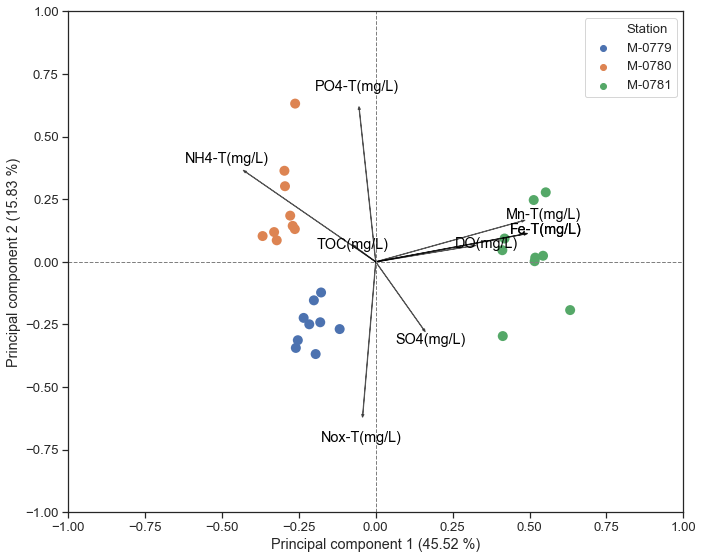

In [18]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from matplotlib_colorbar.colorbar import Colorbar
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm

fig = plt.figure(figsize = (10, 8))


#axins = inset_axes(ax, width='50%', height='50%', loc= 'upper right') 
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca, hue = 'Station', s = 100, edgecolor="none")

for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'black', alpha = 0.6, head_width=0.008)
    plt.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, X.columns[i], color = 'black', ha = 'center', va = 'center')

    
plt.xlabel('Principal component 1 ({:.2f} %)'.format(pc1_eig))
plt.ylabel('Principal component 2 ({:.2f} %)'.format(pc2_eig))

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(y = 0, color = 'grey', linestyle='--', linewidth = 1)
plt.axvline(x = 0, color = 'grey', linestyle='--', linewidth = 1)

#plt.text(.35, .9, 'Permeability ($10^{-18}$ m/s)') #fontsize = 15)|

plt.tight_layout()
plt.savefig('Nitrification_Some', dpi=1000)


#cbar.set_label('Permeability')
#cbar.ax.tick_params(labelsize=10)
#cbar.set_ticks([1e-22, 1e-20, 1e-18])
#plt.gca().add_artist(cbar)
#axins.yaxis.set_ticks_position("right")




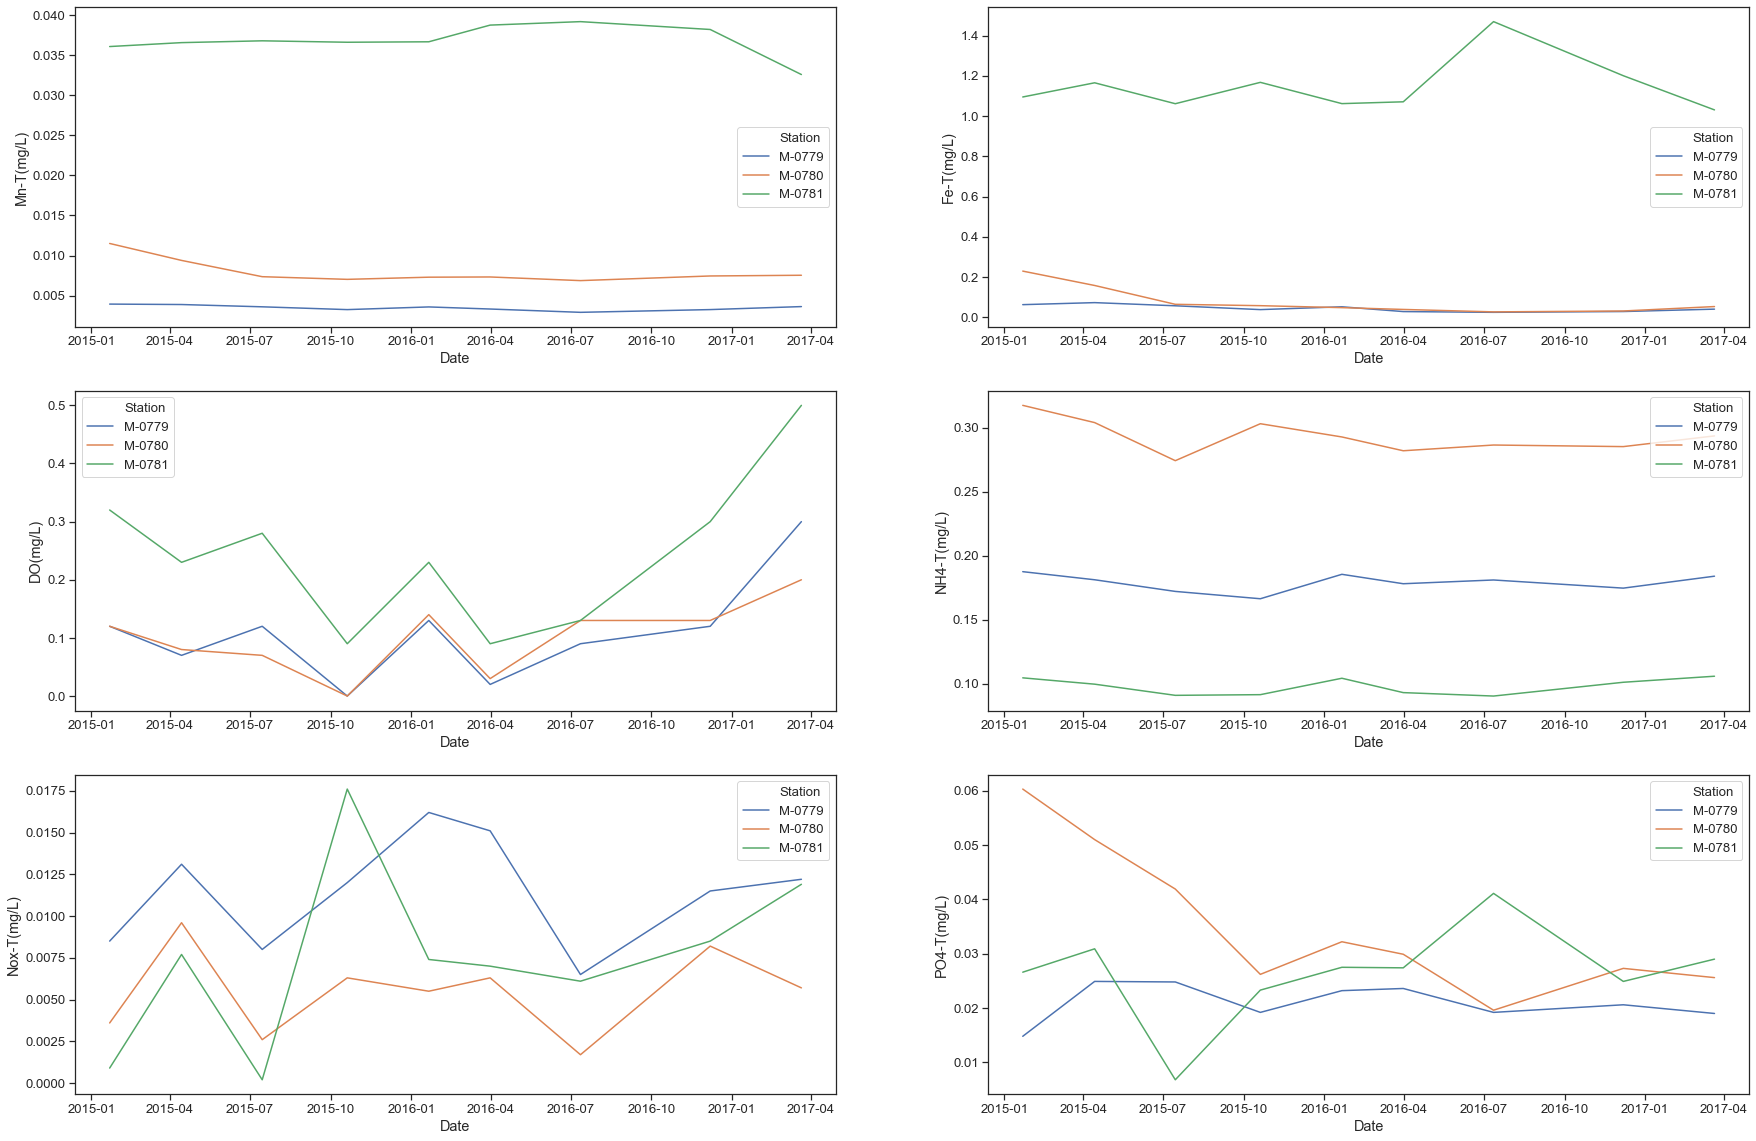

In [20]:
f, ax = plt.subplots(3, 2, figsize = (30, 20))

sns.lineplot(x = 'Date', y = 'Mn-T(mg/L)', data = df, hue = 'Station', ax = ax[0, 0])
sns.lineplot(x = 'Date', y = 'Fe-T(mg/L)', data = df, hue = 'Station', ax = ax[0, 1])
sns.lineplot(x = 'Date', y = 'DO(mg/L)', data = df, hue = 'Station', ax = ax[1, 0])
sns.lineplot(x = 'Date', y = 'NH4-T(mg/L)', data = df, hue = 'Station', ax = ax[1, 1])
sns.lineplot(x = 'Date', y = 'Nox-T(mg/L)', data = df, hue = 'Station', ax = ax[2, 0])
sns.lineplot(x = 'Date', y = 'PO4-T(mg/L)', data = df, hue = 'Station', ax = ax[2, 1])

plt.savefig('Nitrification_Some_Suport', dpi=1000)
plt.show()